# SMOTE Synthetic Data Generation

This notebook demonstrates how to use SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic data for your logistic regression dataset.

SMOTE works by:
1. Finding k-nearest neighbors for each minority class sample
2. Creating synthetic samples by interpolating between the sample and its neighbors
3. Balancing the dataset by oversampling the minority class

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [29]:
# Load the existing dataset
df = pd.read_csv('logistic_regression_data.csv')

print(f"Original dataset shape: {df.shape}")
print(f"\nClass distribution:")
print(df['y'].value_counts())
print(f"\nClass balance ratio:")
print(df['y'].value_counts(normalize=True))

# Display first few rows
print("\nFirst 10 rows:")
print(df.head(10))

Original dataset shape: (200, 2)

Class distribution:
y
0.0    100
1.0    100
Name: count, dtype: int64

Class balance ratio:
y
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

First 10 rows:
          X    y
0  1.764052  0.0
1  0.400157  0.0
2  0.978738  0.0
3  2.240893  0.0
4  1.867558  0.0
5 -0.977278  0.0
6  0.950088  0.0
7 -0.151357  0.0
8 -0.103219  0.0
9  0.410599  0.0


In [30]:
# Prepare data for SMOTE
X = df[['X']].values  # Features (need to be 2D for SMOTE)
y = df['y'].values    # Labels

print(f"Original X shape: {X.shape}")
print(f"Original y shape: {y.shape}")
print(f"\nClass distribution before SMOTE:")
unique, counts = np.unique(y, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples")

Original X shape: (200, 1)
Original y shape: (200,)

Class distribution before SMOTE:
Class 0: 100 samples
Class 1: 100 samples


In [31]:
# Apply SMOTE to generate synthetic data for exactly 1000 samples total
# We'll specify exact counts: 500 samples for each class = 1000 total
# Current data has 100 class 0 and 100 class 1, so we need 400 more for each

smote = SMOTE(
    sampling_strategy={0: 500, 1: 500},  # Generate exactly 500 samples for each class
    random_state=42,
    k_neighbors=5  # Number of neighbors to consider
)

X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"\nAfter SMOTE:")
print(f"X_resampled shape: {X_resampled.shape}")
print(f"y_resampled shape: {y_resampled.shape}")
print(f"\nClass distribution after SMOTE:")
unique, counts = np.unique(y_resampled, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {int(cls)}: {count} samples")
    
print(f"\nTotal samples increased from {len(y)} to {len(y_resampled)}")
print(f"Synthetic samples generated: {len(y_resampled) - len(y)}")


After SMOTE:
X_resampled shape: (1000, 1)
y_resampled shape: (1000,)

Class distribution after SMOTE:
Class 0: 500 samples
Class 1: 500 samples

Total samples increased from 200 to 1000
Synthetic samples generated: 800


In [32]:
# Create DataFrame with the synthetic data
df_synthetic = pd.DataFrame({
    'X': X_resampled.flatten(),
    'y': y_resampled
})

print(f"Synthetic dataset shape: {df_synthetic.shape}")
print(f"\nFirst 10 rows of synthetic dataset:")
print(df_synthetic.head(10))
print(f"\nLast 10 rows of synthetic dataset:")
print(df_synthetic.tail(10))

Synthetic dataset shape: (1000, 2)

First 10 rows of synthetic dataset:
          X    y
0  1.764052  0.0
1  0.400157  0.0
2  0.978738  0.0
3  2.240893  0.0
4  1.867558  0.0
5 -0.977278  0.0
6  0.950088  0.0
7 -0.151357  0.0
8 -0.103219  0.0
9  0.410599  0.0

Last 10 rows of synthetic dataset:
            X    y
990  5.946185  1.0
991  5.305361  1.0
992  5.520609  1.0
993  5.935949  1.0
994  4.246305  1.0
995  5.338118  1.0
996  4.573432  1.0
997  4.189147  1.0
998  4.351420  1.0
999  3.509840  1.0


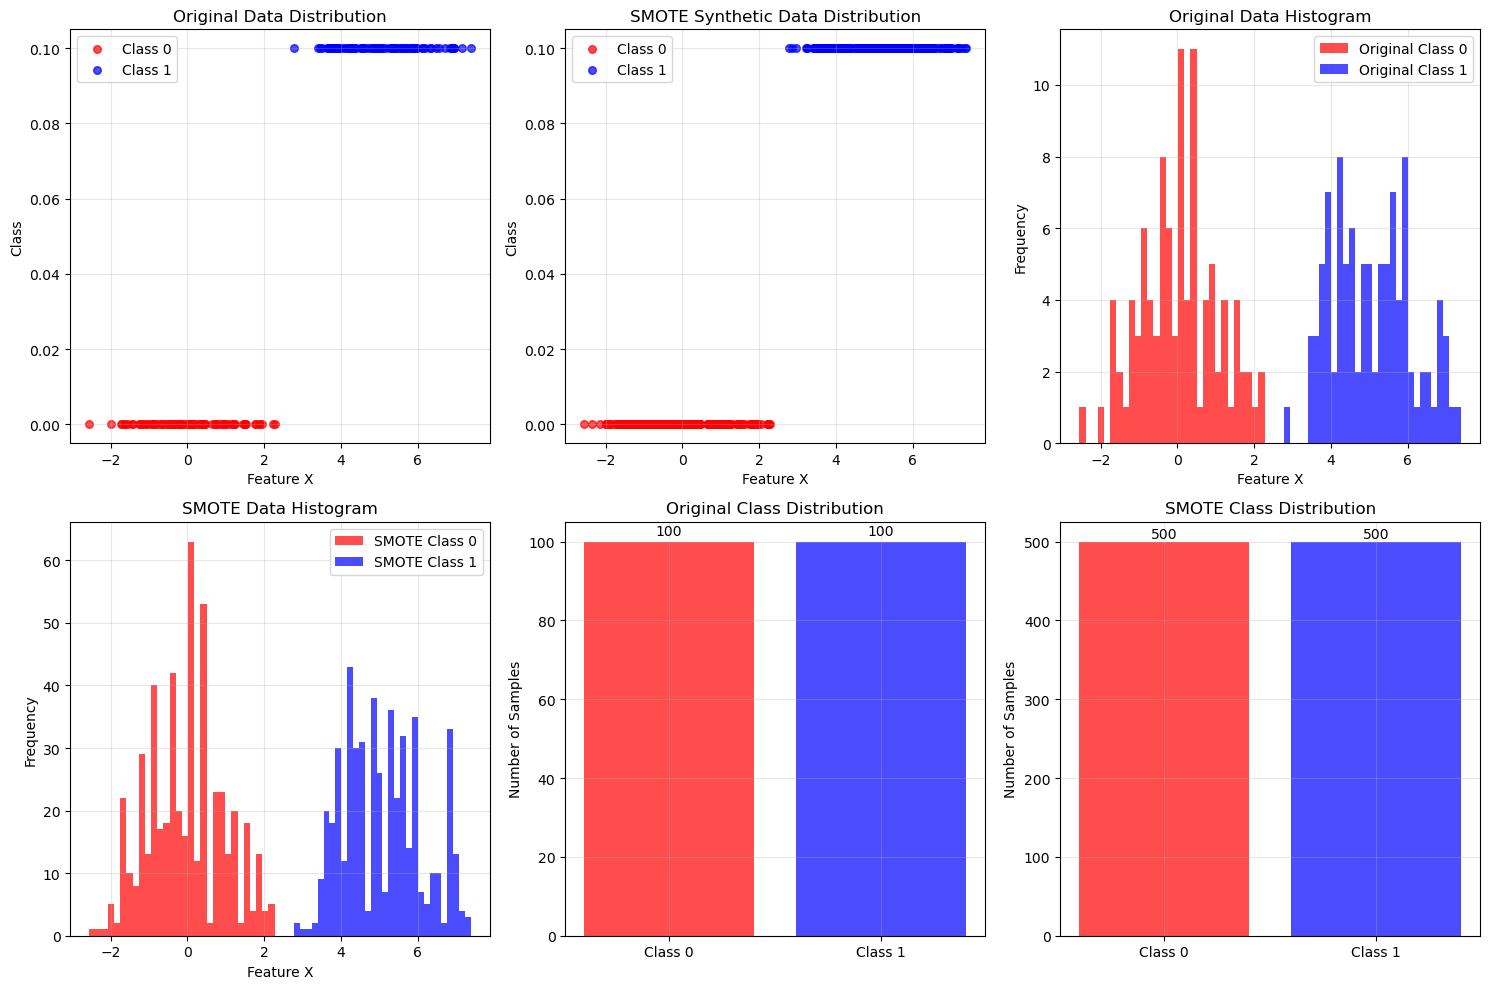

In [33]:
# Visualize original vs synthetic data
plt.figure(figsize=(15, 10))

# Original data distribution
plt.subplot(2, 3, 1)
colors = ['red', 'blue']
labels = ['Class 0', 'Class 1']
for i in range(2):
    mask = y == i
    plt.scatter(X[mask], np.zeros_like(X[mask]) + i*0.1, 
               c=colors[i], label=labels[i], alpha=0.7, s=30)
plt.xlabel('Feature X')
plt.ylabel('Class')
plt.title('Original Data Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# Synthetic data distribution
plt.subplot(2, 3, 2)
for i in range(2):
    mask = y_resampled == i
    plt.scatter(X_resampled[mask], np.zeros_like(X_resampled[mask]) + i*0.1, 
               c=colors[i], label=labels[i], alpha=0.7, s=30)
plt.xlabel('Feature X')
plt.ylabel('Class')
plt.title('SMOTE Synthetic Data Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# Histogram comparison
plt.subplot(2, 3, 3)
plt.hist(X[y==0], alpha=0.7, color='red', label='Original Class 0', bins=30)
plt.hist(X[y==1], alpha=0.7, color='blue', label='Original Class 1', bins=30)
plt.xlabel('Feature X')
plt.ylabel('Frequency')
plt.title('Original Data Histogram')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 4)
plt.hist(X_resampled[y_resampled==0], alpha=0.7, color='red', label='SMOTE Class 0', bins=30)
plt.hist(X_resampled[y_resampled==1], alpha=0.7, color='blue', label='SMOTE Class 1', bins=30)
plt.xlabel('Feature X')
plt.ylabel('Frequency')
plt.title('SMOTE Data Histogram')
plt.legend()
plt.grid(True, alpha=0.3)

# Class balance comparison
plt.subplot(2, 3, 5)
original_counts = [np.sum(y==0), np.sum(y==1)]
plt.bar(['Class 0', 'Class 1'], original_counts, color=['red', 'blue'], alpha=0.7)
plt.ylabel('Number of Samples')
plt.title('Original Class Distribution')
plt.grid(True, alpha=0.3)
for i, v in enumerate(original_counts):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.subplot(2, 3, 6)
smote_counts = [np.sum(y_resampled==0), np.sum(y_resampled==1)]
plt.bar(['Class 0', 'Class 1'], smote_counts, color=['red', 'blue'], alpha=0.7)
plt.ylabel('Number of Samples')
plt.title('SMOTE Class Distribution')
plt.grid(True, alpha=0.3)
for i, v in enumerate(smote_counts):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [34]:
# Compare model performance: Original vs SMOTE data
print("=" * 60)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 60)

# Train model on original data
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model_orig = LogisticRegression(random_state=42)
model_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = model_orig.predict(X_test_orig)

print("\n1. MODEL TRAINED ON ORIGINAL DATA:")
print(f"Training set size: {len(X_train_orig)}")
print(f"Test set size: {len(X_test_orig)}")
print(f"Training accuracy: {model_orig.score(X_train_orig, y_train_orig):.4f}")
print(f"Test accuracy: {model_orig.score(X_test_orig, y_test_orig):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_orig, y_pred_orig))

MODEL PERFORMANCE COMPARISON

1. MODEL TRAINED ON ORIGINAL DATA:
Training set size: 140
Test set size: 60
Training accuracy: 1.0000
Test accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [35]:
# Train model on SMOTE data
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test_smote)

print("\n2. MODEL TRAINED ON SMOTE DATA:")
print(f"Training set size: {len(X_train_smote)}")
print(f"Test set size: {len(X_test_smote)}")
print(f"Training accuracy: {model_smote.score(X_train_smote, y_train_smote):.4f}")
print(f"Test accuracy: {model_smote.score(X_test_smote, y_test_smote):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_smote, y_pred_smote))


2. MODEL TRAINED ON SMOTE DATA:
Training set size: 700
Test set size: 300
Training accuracy: 1.0000
Test accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       150
         1.0       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



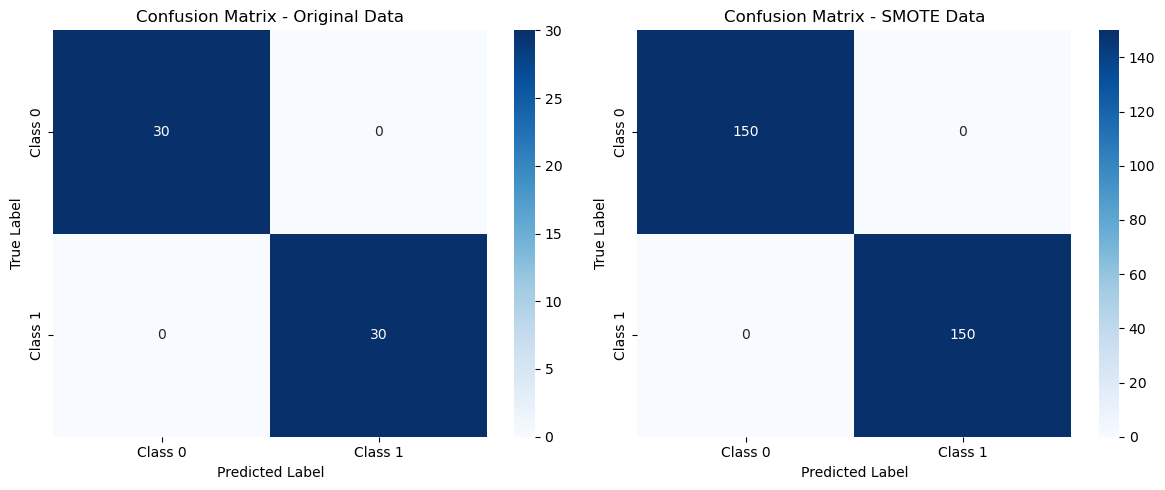

In [36]:
# Visualize confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm_orig = confusion_matrix(y_test_orig, y_pred_orig)
sns.heatmap(cm_orig, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Original Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.subplot(1, 2, 2)
cm_smote = confusion_matrix(y_test_smote, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - SMOTE Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

In [37]:
# Save the synthetic dataset
output_filename = 'smote_synthetic_data.csv'
df_synthetic.to_csv(output_filename, index=False)

print(f"\n✅ Synthetic dataset saved as '{output_filename}'")
print(f"📊 Dataset contains {len(df_synthetic)} samples")
print(f"⚖️ Perfect class balance: {np.sum(y_resampled==0)} vs {np.sum(y_resampled==1)}")
print(f"🎯 Synthetic samples created: {len(y_resampled) - len(y)}")

print("\n" + "="*60)
print("SMOTE SYNTHETIC DATA GENERATION COMPLETE!")
print("="*60)
print(f"✨ Original dataset: {len(y)} samples")
print(f"✨ Synthetic dataset: {len(y_resampled)} samples")
print(f"✨ Improvement: {(len(y_resampled)/len(y)-1)*100:.1f}% more data")
print(f"✨ Perfect balance achieved with SMOTE!")


✅ Synthetic dataset saved as 'smote_synthetic_data.csv'
📊 Dataset contains 1000 samples
⚖️ Perfect class balance: 500 vs 500
🎯 Synthetic samples created: 800

SMOTE SYNTHETIC DATA GENERATION COMPLETE!
✨ Original dataset: 200 samples
✨ Synthetic dataset: 1000 samples
✨ Improvement: 400.0% more data
✨ Perfect balance achieved with SMOTE!
